In [3]:
# different lambda, similar dist
import numpy as np
    
diffs_mse = np.load('./costs_d/diffs_mse.npy', allow_pickle=True)
diffs1 = np.load('./costs_d/diffs_q1.npy', allow_pickle=True)
diffs1_1 = np.load('./costs_d/diffs_q1_1.npy', allow_pickle=True)
diffs1_5 = np.load('./costs_d/diffs_q1_5.npy', allow_pickle=True)
diffs5 = np.load('./costs_d/diffs_q5.npy', allow_pickle=True)

print("==== Similar group, Different lambda ====\n")
print("--- Cost Variance. Testing Results ---")
print(f"Equitable PM, q+1=1.0: {np.var(diffs1):.6f}")
print(f"Equitable PM, q+1=1.1: {np.var(diffs1_1):.6f}")
print(f"Equitable PM, q+1=1.5: {np.var(diffs1_5):.6f}")
print(f"Equitable PM, q+1=5.0: {np.var(diffs5):.6f}", "\n")
print(f"Plain PM: {np.var(diffs_mse):.6f}\n")

print("--- Cost Mean. Testing Results ---")
print(f"Equitable PM, q+1=1.0: {np.mean(diffs1):.6f}")
print(f"Equitable PM, q+1=1.1: {np.mean(diffs1_1):.6f}")
print(f"Equitable PM, q+1=1.5: {np.mean(diffs1_5):.6f}")
print(f"Equitable PM, q+1=5.0: {np.mean(diffs5):.6f}", "\n")
print(f"Plain PM: {np.mean(diffs_mse):.6f}\n")

print("--- Cost Quantile (C95 - C5). Testing Results ---")
print(f"Equitable PM, q+1=1.0: {np.percentile(diffs1, 95) - np.percentile(diffs1, 5):.6f}")
print(f"Equitable PM, q+1=1.1: {np.percentile(diffs1_1, 95) - np.percentile(diffs1_1, 5):.6f}")
print(f"Equitable PM, q+1=1.5: {np.percentile(diffs1_5, 95) - np.percentile(diffs1_5, 5):.6f}")
print(f"Equitable PM, q+1=5.0: {np.percentile(diffs5, 95) - np.percentile(diffs5, 5):.6f}", "\n")
print(f"Plain PM: {np.percentile(diffs_mse, 95) - np.percentile(diffs_mse, 5):.6f}")




==== Similar group, Different lambda ====

--- Cost Variance. Testing Results ---
Equitable PM, q+1=1.0: 0.002910
Equitable PM, q+1=1.1: 0.000340
Equitable PM, q+1=1.5: 0.000249
Equitable PM, q+1=5.0: 0.000079 

Plain PM: 0.008582

--- Cost Mean. Testing Results ---
Equitable PM, q+1=1.0: 0.159073
Equitable PM, q+1=1.1: 0.054359
Equitable PM, q+1=1.5: 0.046495
Equitable PM, q+1=5.0: 0.026280 

Plain PM: 0.273169

--- Cost Quantile (C95 - C5). Testing Results ---
Equitable PM, q+1=1.0: 0.168701
Equitable PM, q+1=1.1: 0.057649
Equitable PM, q+1=1.5: 0.049309
Equitable PM, q+1=5.0: 0.027871 

Plain PM: 0.289701


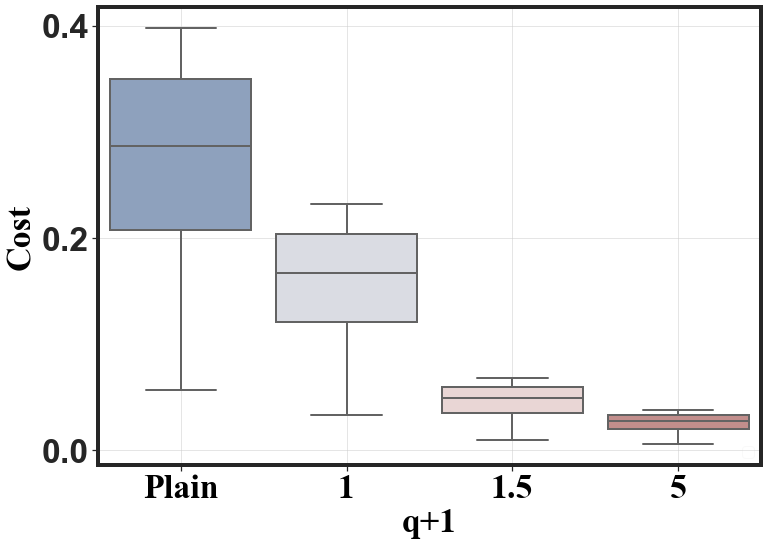

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
hue_order  = ["plain", "q+1=1", "q+1=1.5", "q+1=5"]  
labels_vis = ["plain", "q+1=1", "q+1=1.5", "q+1=5"]  


data = {
    "plain": diffs_mse,
    "q+1=1": diffs1,
    "q+1=1.5": diffs1_5,
    "q+1=5": diffs5
}


df_res = pd.DataFrame(data, columns=hue_order)


sns.set_theme(style="ticks")
colors = sns.color_palette("vlag")

f,ax = plt.subplots(1, figsize=(10,7))
colors = sns.color_palette()
colors = "vlag"
b = sns.boxplot(
    data=df_res,
    linewidth=2,
    width=0.85,
    palette=colors,
    showfliers=True,
    fliersize=2,
    hue_order = hue_order
)

font = {'family': 'Times New Roman',
        'color':  'black',
        'size': 34,
         'weight': 'bold',
        }

b.set_ylabel("")

f.tight_layout()

plt.yticks([0, 0.2, 0.4],fontsize = 34,fontweight='bold')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Plain', '1', '1.5', '5'], fontdict=font)

ax.spines['bottom'].set_linewidth(4);
ax.spines['left'].set_linewidth(4);
ax.spines['right'].set_linewidth(4);
ax.spines['top'].set_linewidth(4);


handles,labels = ax.get_legend_handles_labels()

lengend_order = [j for j in range(len(labels))]

sorted_legends = [labels_vis[i] for i in lengend_order]
sorted_handles = [handles[i] for i in lengend_order]
plt.legend(sorted_handles,sorted_legends,prop={'size': 15, 'weight':'bold'},ncol=1,
           framealpha=0.1,loc='lower right')

ax.set_xlabel("q+1", fontweight='bold', fontdict=font)
ax.set_ylabel("Cost", fontweight='bold', fontdict=font)



plt.grid(True,alpha=0.5)
# plt.savefig(pdf_file, bbox_inches='tight')
plt.show()


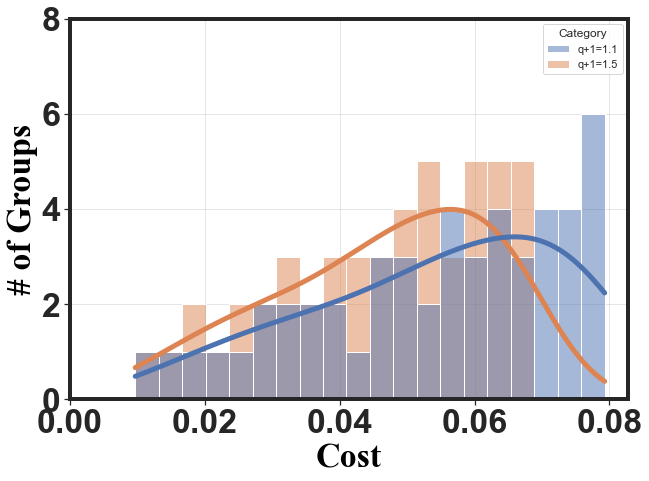

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create DataFrame from dictionary
data = {
    "q+1=1.1": diffs1_1,
    "q+1=1.5": diffs1_5
}

df_res = pd.DataFrame(data)

# Melt DataFrame to long format for seaborn
df_res_melted = df_res.melt(var_name='Category', value_name='Value')

# Set seaborn theme
sns.set_theme(style="ticks")

# Create plot
f, ax = plt.subplots(1, figsize=(10, 7))

# Plot data with seaborn
sns.histplot(
    data=df_res_melted,
    x="Value",
    hue="Category",
    hue_order=["q+1=1.1", "q+1=1.5"],
    bins=20,
    kde=True,
    line_kws={"lw": 5}
)

font = {'family': 'Times New Roman',
        'color':  'black',
        'size': 34,
         'weight': 'bold',
        }


# Customize the font
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)

# Customize ticks and labels
plt.yticks(fontsize=34,  fontweight='bold')
plt.xticks([0, 0.02, 0.04, 0.06, 0.08], fontsize=34, fontweight='bold')
ax.set_yticks([0, 2, 4, 6, 8])
ax.set_ylim([0, 8])
ax.set_xlabel("Cost", fontweight='bold', fontdict=font)
ax.set_ylabel("# of Groups", fontweight='bold', fontdict=font)

# Add grid
plt.grid(True, alpha=0.5)

plt.show()


In [6]:
# same lambda, different dist
import numpy as np


diffs_mse = np.load('./costs_d/diffs_mse_sLdD.npy', allow_pickle=True)
diffs1 = np.load('./costs_d/diffs_q1_sLdD.npy', allow_pickle=True)
diffs3 = np.load('./costs_d/diffs_q3_sLdD.npy', allow_pickle=True)
diffs20 = np.load('./costs_d/diffs_q20_sLdD.npy', allow_pickle=True)


print("==== Different group, Same lambda ====\n")
print("--- Cost Variance. Testing Results ---")
print(f"Equitable PM, q+1=1: {np.var(diffs1):.6f}")
print(f"Equitable PM, q+1=3: {np.var(diffs3):.6f}")
print(f"Equitable PM, q+1=20: {np.var(diffs20):.6f}\n")
print(f"Plain PM: {np.var(diffs_mse):.6f}\n")

print("--- Cost Mean. Testing Results ---")
print(f"Equitable PM, q+1=1: {np.mean(diffs1):.6f}")
print(f"Equitable PM, q+1=3: {np.mean(diffs3):.6f}")
print(f"Equitable PM, q+1=20: {np.mean(diffs20):.6f}\n")
print(f"Plain PM: {np.mean(diffs_mse):.6f}\n")

print("--- Cost Quantile (C95 - C5). Testing Results ---")
print(f"Equitable PM, q+1=1: {np.percentile(diffs1, 95) - np.percentile(diffs1, 5):.6f}")
print(f"Equitable PM, q+1=3: {np.percentile(diffs3, 95) - np.percentile(diffs3, 5):.6f}")
print(f"Equitable PM, q+1=20: {np.percentile(diffs20, 95) - np.percentile(diffs20, 5):.6f}\n")
print(f"Plain PM: {np.percentile(diffs_mse, 95) - np.percentile(diffs_mse, 5):.6f}")




==== Different group, Same lambda ====

--- Cost Variance. Testing Results ---
Equitable PM, q+1=1: 0.000763
Equitable PM, q+1=3: 0.000109
Equitable PM, q+1=20: 0.000017

Plain PM: 0.000900

--- Cost Mean. Testing Results ---
Equitable PM, q+1=1: 0.090964
Equitable PM, q+1=3: 0.034455
Equitable PM, q+1=20: 0.013641

Plain PM: 0.098798

--- Cost Quantile (C95 - C5). Testing Results ---
Equitable PM, q+1=1: 0.080902
Equitable PM, q+1=3: 0.030644
Equitable PM, q+1=20: 0.012133

Plain PM: 0.087870


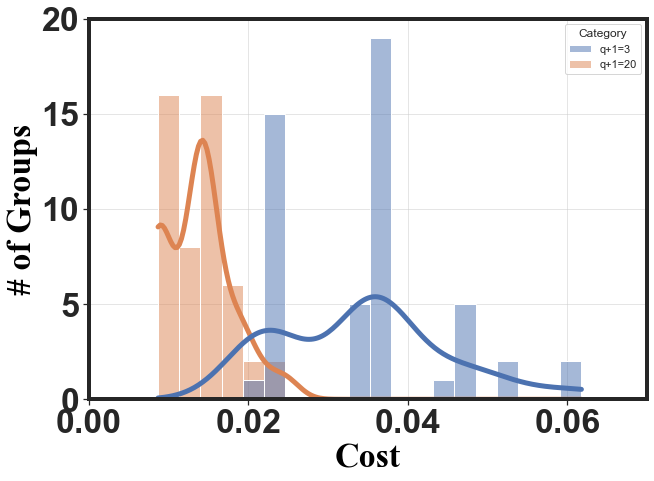

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create DataFrame from dictionary
data = {
    "q+1=3": diffs3,
    "q+1=20": diffs20
}

df_res = pd.DataFrame(data)

# Melt DataFrame to long format for seaborn
df_res_melted = df_res.melt(var_name='Category', value_name='Value')

# Set seaborn theme
sns.set_theme(style="ticks")

# Create plot
f, ax = plt.subplots(1, figsize=(10, 7))

# Plot data with seaborn
sns.histplot(
    data=df_res_melted,
    x="Value",
    hue="Category",
    hue_order=["q+1=3", "q+1=20"],
    bins=20,
    kde=True,
    line_kws={"lw": 5}
)

# Customize the font
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)

# Customize ticks and labels
plt.yticks(fontsize=34,fontweight='bold')
plt.xticks(fontsize=34,fontweight='bold')
ax.set_yticks([0, 5, 10, 15, 20])
ax.set_xticks([0, 0.02, 0.04, 0.06])
ax.set_ylim([0, 20])
ax.set_xlim([0, 0.07])
ax.set_xlabel("Cost", fontweight='bold', fontdict=font)
ax.set_ylabel("# of Groups", fontweight='bold', fontdict=font)

# Add grid
plt.grid(True, alpha=0.5)


plt.show()


In [8]:
# different lambda, different dist
import numpy as np

diffs_mse = np.load('./costs_d/diffs_mse_dLdD.npy', allow_pickle=True)
diffs1 = np.load('./costs_d/diffs_q1_dLdD.npy', allow_pickle=True)
diffs3 = np.load('./costs_d/diffs_q3_dLdD.npy', allow_pickle=True)
diffs10 = np.load('./costs_d/diffs_q10_dLdD.npy', allow_pickle=True)

print("==== Different group, Same lambda ====\n")
print("--- Cost Variance. Testing Results ---")
print(f"Equitable PM, q+1=1: {np.var(diffs1):.6f}")
print(f"Equitable PM, q+1=3: {np.var(diffs3):.6f}")
print(f"Equitable PM, q+1=10: {np.var(diffs10):.6f}\n")
print(f"Plain PM: {np.var(diffs_mse):.6f}\n")

print("--- Cost Mean. Testing Results ---")
print(f"Equitable PM, q+1=1: {np.mean(diffs1):.6f}")
print(f"Equitable PM, q+1=3: {np.mean(diffs3):.6f}")
print(f"Equitable PM, q+1=10: {np.mean(diffs10):.6f}\n")
print(f"Plain PM: {np.mean(diffs_mse):.6f}\n")

print("--- Cost Quantile (C95 - C5). Testing Results ---")
print(f"Equitable PM, q+1=1: {np.percentile(diffs1, 95) - np.percentile(diffs1, 5):.6f}")
print(f"Equitable PM, q+1=3: {np.percentile(diffs3, 95) - np.percentile(diffs3, 5):.6f}")
print(f"Equitable PM, q+1=10: {np.percentile(diffs10, 95) - np.percentile(diffs10, 5):.6f}\n")
print(f"Plain PM: {np.percentile(diffs_mse, 95) - np.percentile(diffs_mse, 5):.6f}")




==== Different group, Same lambda ====

--- Cost Variance. Testing Results ---
Equitable PM, q+1=1: 0.018074
Equitable PM, q+1=3: 0.006767
Equitable PM, q+1=10: 0.005493

Plain PM: 0.060170

--- Cost Mean. Testing Results ---
Equitable PM, q+1=1: 0.261911
Equitable PM, q+1=3: 0.160256
Equitable PM, q+1=10: 0.144386

Plain PM: 0.477871

--- Cost Quantile (C95 - C5). Testing Results ---
Equitable PM, q+1=1: 0.422960
Equitable PM, q+1=3: 0.258797
Equitable PM, q+1=10: 0.233168

Plain PM: 0.771712


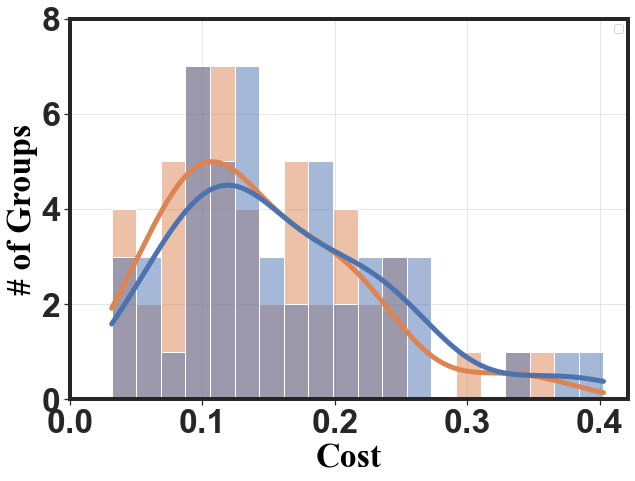

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create DataFrame from dictionary
data = {
    "q+1=3": diffs3,
    "q+1=10": diffs10
}

df_res = pd.DataFrame(data)
# print(df_res)

# Melt DataFrame to long format for seaborn
df_res_melted = df_res.melt(var_name='Category', value_name='Value')

# Set seaborn theme
sns.set_theme(style="ticks")

# Create plot
f, ax = plt.subplots(1, figsize=(10, 7))

# Plot data with seaborn
sns.histplot(
    data=df_res_melted,
    x="Value",
    hue="Category",
    hue_order=["q+1=3", "q+1=10"],
    bins=20,
    kde=True,
    line_kws={"lw": 5}
)

# Customize the font
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)

# Customize ticks and labels
plt.yticks(fontsize=34, fontweight='bold')
plt.xticks(fontsize=34, fontweight='bold')
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4], fontweight='bold', fontsize=34)
ax.set_yticks([0, 2, 4, 6, 8], fontweight='bold', fontsize=34)
ax.set_ylim([0, 8])

ax.set_xlabel("Cost", fontweight='bold', fontdict=font)
ax.set_ylabel("# of Groups", fontweight='bold', fontdict=font)

# Add grid
plt.grid(True, alpha=0.5)

plt.legend("")

plt.show()
